In [14]:
!pip3 install pandas


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip


In [15]:
!pip3 install pandas

import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip


=== АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ СТУДЕНТОВ ===

1. 📁 ЗАГРУЗКА ДАННЫХ
Загружено данных: (10000, 6)

2. 📊 АНАЛИЗ ДАННЫХ
Основные статистики:
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

        Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  10000.000000                      10000.000000       10000.000000  
mean       6.530600                          4.583300          55.224800  
std        1.6958

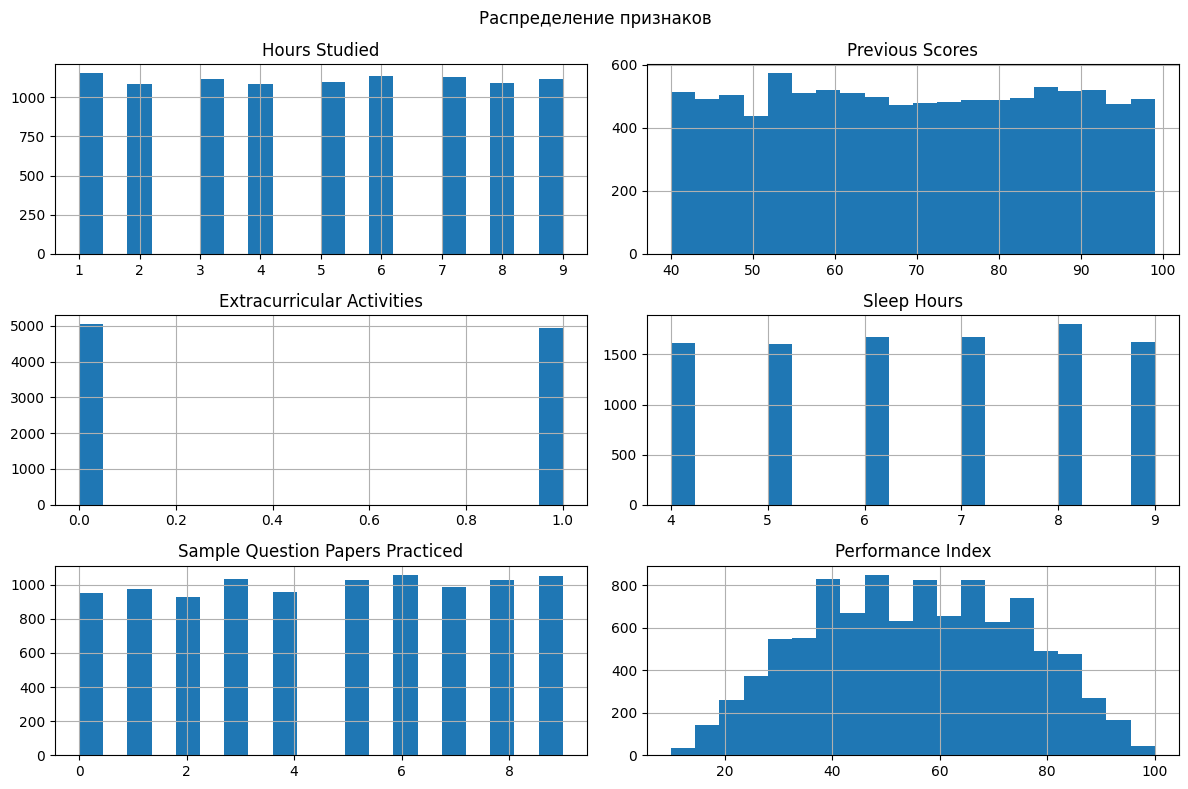

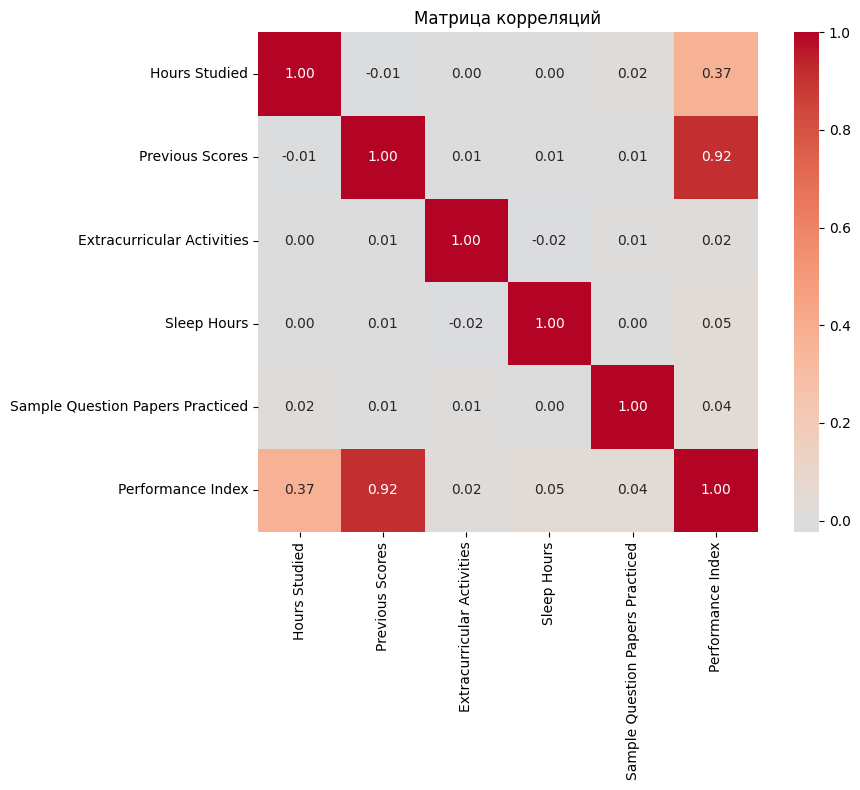


3. 🔄 НОРМАЛИЗАЦИЯ ДАННЫХ

4. 🎯 РАЗДЕЛЕНИЕ ДАННЫХ
Обучающая выборка: (8000, 5)
Тестовая выборка: (2000, 5)

5. 🛠️ СОЗДАНИЕ ДОПОЛНИТЕЛЬНЫХ ПРИЗНАКОВ
Добавлены новые признаки: {'Hours_Studied_Squared', 'Study_Efficiency'}

6. 🧪 ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ
📊 Все признаки:
   R² score: 0.9890
   Bias (intercept): 0.0008
   Weights: {'Hours Studied': np.float64(0.3844), 'Previous Scores': np.float64(0.918), 'Extracurricular Activities': np.float64(0.0158), 'Sleep Hours': np.float64(0.0421), 'Sample Question Papers Practiced': np.float64(0.0286)}

📊 Без Hours Studied:
   R² score: 0.8441
   Bias (intercept): -0.0007
   Weights: {'Previous Scores': np.float64(0.9138), 'Extracurricular Activities': np.float64(0.0172), 'Sleep Hours': np.float64(0.0449), 'Sample Question Papers Practiced': np.float64(0.0342)}

📊 Hours Studied + Previous Scores:
   R² score: 0.9859
   Bias (intercept): 0.0014
   Weights: {'Hours Studied': np.float64(0.3852), 'Previous Scores': np.float64(0.9184)}

📊 Только Hours St

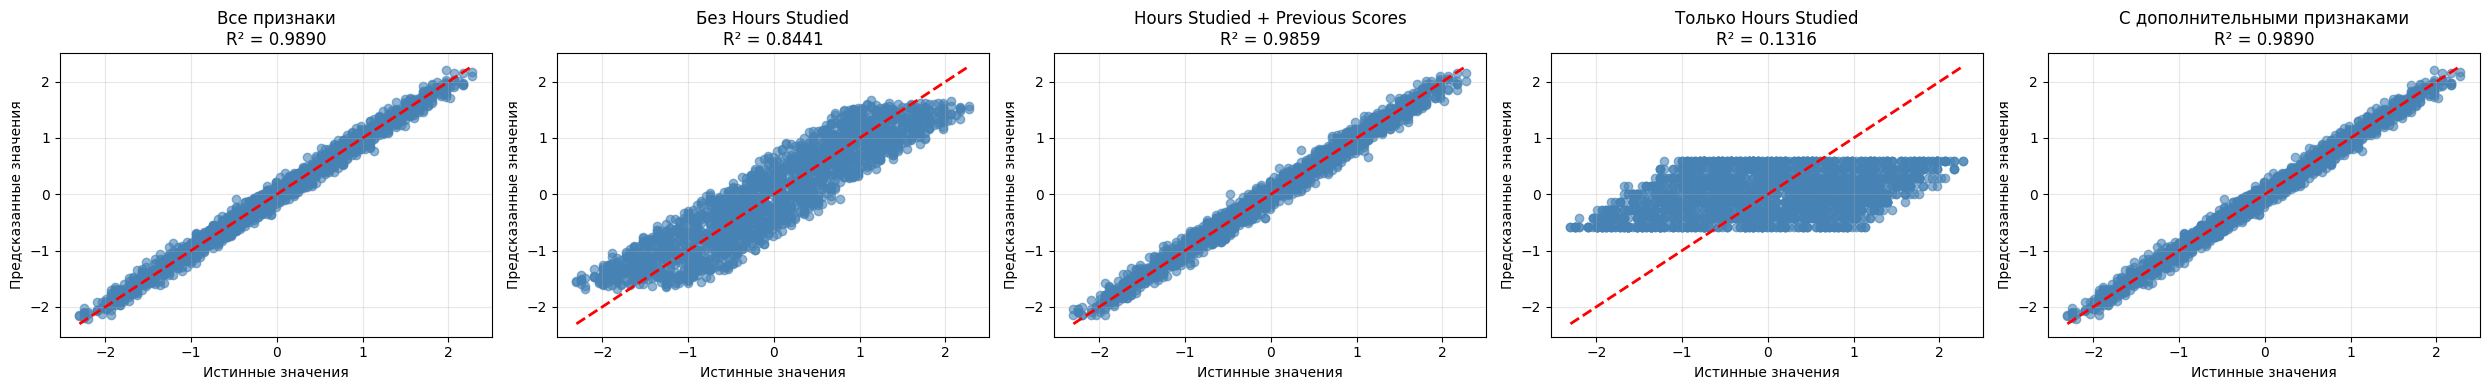

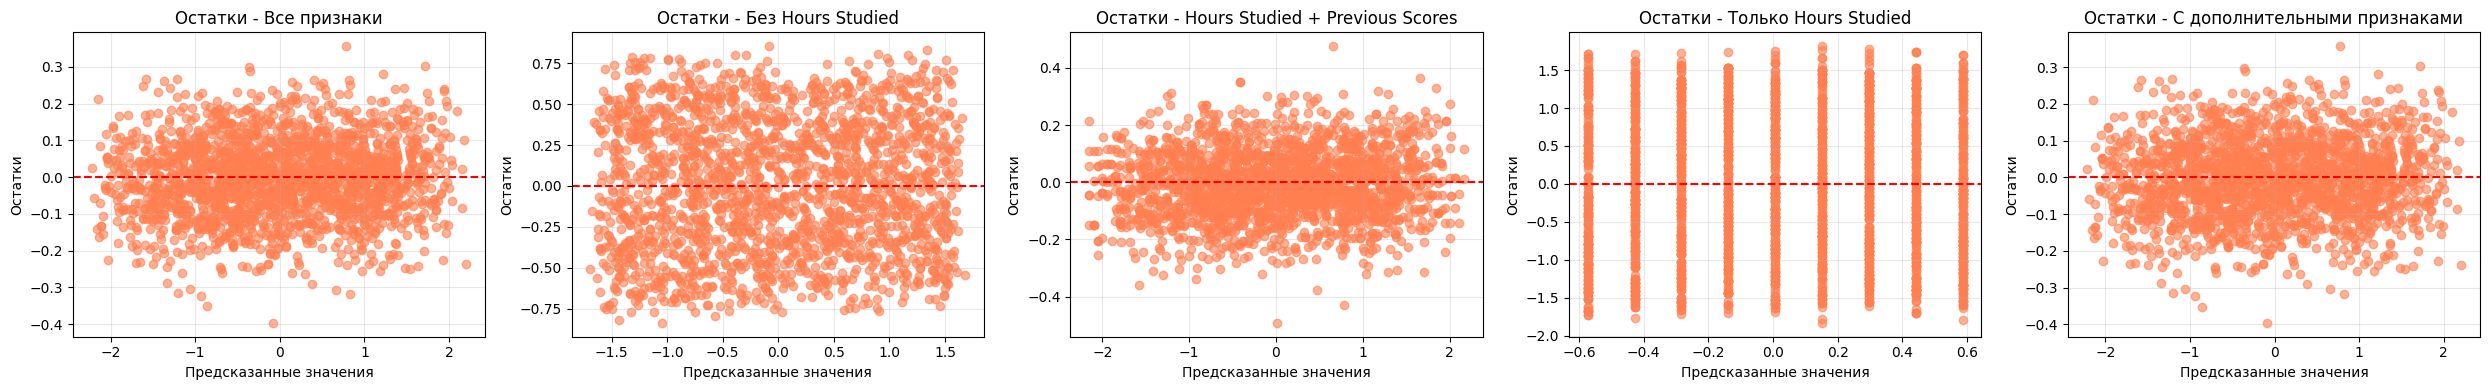


9. 🏆 АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: С дополнительными признаками


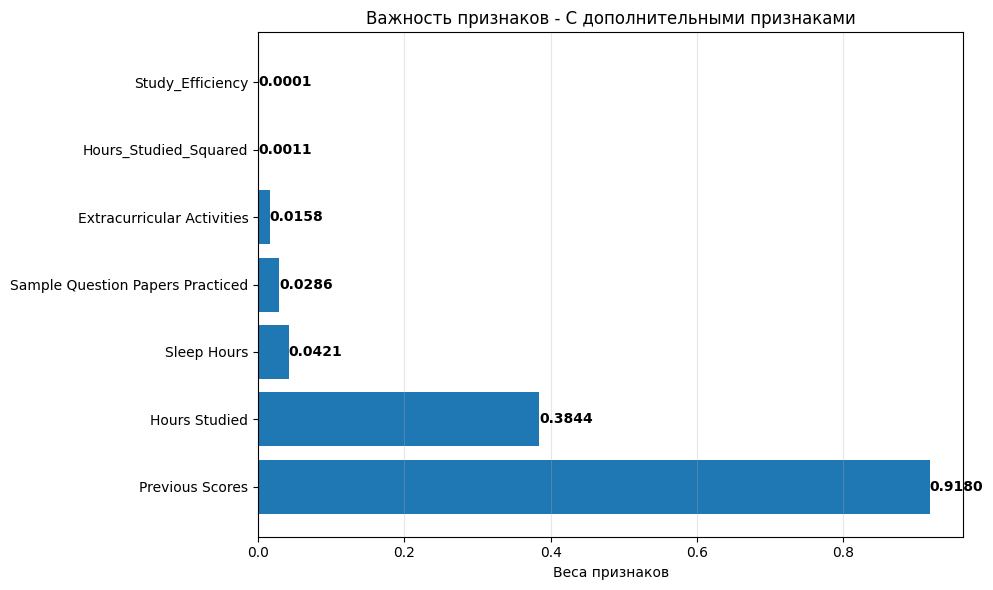


🎯 ИТОГОВЫЕ РЕЗУЛЬТАТЫ
   Все признаки: R² = 0.9890
   Без Hours Studied: R² = 0.8441
   Hours Studied + Previous Scores: R² = 0.9859
   Только Hours Studied: R² = 0.1316
🏆 ЛУЧШАЯ С дополнительными признаками: R² = 0.9890

💡 Рекомендация: Использовать модель 'С дополнительными признаками'
📊 Качество предсказаний: 98.9%


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def linear_regression_fit(X, y, method='normal'):
    """
    Обучение линейной регрессии
    Возвращает bias и weights
    """
    if method == 'normal':
        # Нормальное уравнение: w = (X^T * X)^-1 * X^T * y
        X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
        try:
            weights = np.linalg.pinv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
            return weights[0], weights[1:]
        except np.linalg.LinAlgError:
            print("Предупреждение: Вырожденная матрица, используем SGD")
            return linear_regression_fit_sgd(X, y)
    else:
        return linear_regression_fit_sgd(X, y)

def linear_regression_fit_sgd(X, y, learning_rate=0.01, epochs=1000):
    """Стохастический градиентный спуск"""
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    
    for epoch in range(epochs):
        y_pred = X @ weights + bias
        error = y_pred - y
        
        # Градиенты
        dw = (2/n_samples) * X.T @ error
        db = (2/n_samples) * np.sum(error)
        
        # Обновление весов
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        if epoch % 200 == 0:
            loss = np.mean(error ** 2)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return bias, weights

def linear_regression_predict(X, bias, weights):
    """Предсказание с использованием обученных параметров"""
    return X @ weights + bias

def load_and_preprocess_data(file_path):
    """Загрузка и предобработка данных"""
    # Загрузка данных
    data = pd.read_csv(file_path)
    print(f"Загружено данных: {data.shape}")
    
    # Кодирование категориальных признаков
    if "Extracurricular Activities" in data.columns:
        data["Extracurricular Activities"] = data["Extracurricular Activities"].map({"Yes": 1, "No": 0})
    
    # Обработка пропущенных значений
    if data.isnull().sum().sum() > 0:
        print("Обнаружены пропущенные значения:")
        print(data.isnull().sum())
        data = data.fillna(data.mean())
    
    return data

def normalize_data(data):
    """Z-нормализация данных"""
    return (data - data.mean()) / data.std()

def train_test_split_custom(data, target_col, test_size=0.2, random_state=42):
    """Разделение данных на обучающую и тестовую выборки"""
    np.random.seed(random_state)
    n_samples = len(data)
    n_test = int(n_samples * test_size)
    
    shuffled_indices = np.random.permutation(n_samples)
    test_indices = shuffled_indices[:n_test]
    train_indices = shuffled_indices[n_test:]
    
    X_train = data.drop(target_col, axis=1).iloc[train_indices]
    y_train = data[target_col].iloc[train_indices]
    X_test = data.drop(target_col, axis=1).iloc[test_indices]
    y_test = data[target_col].iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

def r2_score(y_true, y_pred):
    """Коэффициент детерминации R²"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

def create_synthetic_features(X_train, X_test):
    """Создание синтетических признаков"""
    X_train_extended = X_train.copy()
    X_test_extended = X_test.copy()
    
    # Взаимодействие признаков
    if all(col in X_train.columns for col in ['Hours Studied', 'Previous Scores']):
        X_train_extended['Study_Efficiency'] = X_train_extended['Hours Studied'] * X_train_extended['Previous Scores']
        X_test_extended['Study_Efficiency'] = X_test_extended['Hours Studied'] * X_test_extended['Previous Scores']
    
    # Квадратичные признаки
    if 'Hours Studied' in X_train.columns:
        X_train_extended['Hours_Studied_Squared'] = X_train_extended['Hours Studied'] ** 2
        X_test_extended['Hours_Studied_Squared'] = X_test_extended['Hours Studied'] ** 2
    
    return X_train_extended, X_test_extended

def train_and_evaluate_model(X_train, X_test, y_train, y_test, feature_names, model_name):
    """Обучение и оценка одной модели"""
    # Выбираем только нужные признаки
    X_train_subset = X_train[feature_names].values if isinstance(feature_names, list) else X_train.values
    X_test_subset = X_test[feature_names].values if isinstance(feature_names, list) else X_test.values
    
    # Обучаем модель
    bias, weights = linear_regression_fit(X_train_subset, y_train.values)
    
    # Делаем предсказания
    y_pred = linear_regression_predict(X_test_subset, bias, weights)
    
    # Оцениваем качество
    r2 = r2_score(y_test.values, y_pred)
    
    print(f"📊 {model_name}:")
    print(f"   R² score: {r2:.4f}")
    print(f"   Bias (intercept): {bias:.4f}")
    print(f"   Weights: {dict(zip(feature_names, np.round(weights, 4))) if isinstance(feature_names, list) else np.round(weights, 4)}")
    print()
    
    return r2, y_pred, bias, weights

def plot_feature_importance(feature_names, weights, model_name):
    """Визуализация важности признаков"""
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Weight': weights
    }).sort_values('Weight', key=abs, ascending=False)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(importance_df['Feature'], importance_df['Weight'])
    plt.xlabel('Веса признаков')
    plt.title(f'Важность признаков - {model_name}')
    plt.grid(axis='x', alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.4f}', ha='left' if width >= 0 else 'right', 
                va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def plot_predictions_comparison(y_test, predictions_dict):
    """Визуализация сравнения предсказаний"""
    n_models = len(predictions_dict)
    fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
    
    if n_models == 1:
        axes = [axes]
    
    for idx, (model_name, y_pred) in enumerate(predictions_dict.items()):
        axes[idx].scatter(y_test, y_pred, alpha=0.6, color='steelblue')
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
        axes[idx].set_xlabel('Истинные значения')
        axes[idx].set_ylabel('Предсказанные значения')
        axes[idx].set_title(f'{model_name}\nR² = {r2_score(y_test, y_pred):.4f}')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_residuals(y_test, predictions_dict):
    """Визуализация остатков"""
    n_models = len(predictions_dict)
    fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 4))
    
    if n_models == 1:
        axes = [axes]
    
    for idx, (model_name, y_pred) in enumerate(predictions_dict.items()):
        residuals = y_test - y_pred
        axes[idx].scatter(y_pred, residuals, alpha=0.6, color='coral')
        axes[idx].axhline(y=0, color='red', linestyle='--')
        axes[idx].set_xlabel('Предсказанные значения')
        axes[idx].set_ylabel('Остатки')
        axes[idx].set_title(f'Остатки - {model_name}')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Основной блок выполнения
def main():
    print("=== АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ СТУДЕНТОВ ===\n")
    
    # 1. Загрузка и предобработка данных
    print("1. 📁 ЗАГРУЗКА ДАННЫХ")
    data = load_and_preprocess_data('Student_Performance.csv')
    
    # 2. Анализ данных
    print("\n2. 📊 АНАЛИЗ ДАННЫХ")
    print("Основные статистики:")
    print(data.describe())

    # Визуализация распределений
    data.hist(figsize=(12, 8), bins=20)
    plt.suptitle('Распределение признаков')
    plt.tight_layout()
    plt.show()
    
    # Матрица корреляций
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Матрица корреляций')
    plt.tight_layout()
    plt.show()
    
    # 3. Нормализация данных
    print("\n3. 🔄 НОРМАЛИЗАЦИЯ ДАННЫХ")
    normalized_data = normalize_data(data)
    
    # 4. Разделение данных
    print("\n4. 🎯 РАЗДЕЛЕНИЕ ДАННЫХ")
    X_train, X_test, y_train, y_test = train_test_split_custom(
        normalized_data, 'Performance Index', test_size=0.2
    )
    print(f"Обучающая выборка: {X_train.shape}")
    print(f"Тестовая выборка: {X_test.shape}")
    
    # 5. Создание расширенных признаков
    print("\n5. 🛠️ СОЗДАНИЕ ДОПОЛНИТЕЛЬНЫХ ПРИЗНАКОВ")
    X_train_extended, X_test_extended = create_synthetic_features(X_train, X_test)
    print(f"Добавлены новые признаки: {set(X_train_extended.columns) - set(X_train.columns)}")
    
    # 6. Определение конфигураций моделей
    models_config = {
        "Все признаки": X_train.columns.tolist(),
        "Без Hours Studied": [col for col in X_train.columns if col != 'Hours Studied'],
        "Hours Studied + Previous Scores": ['Hours Studied', 'Previous Scores'],
        "Только Hours Studied": ['Hours Studied'],
        "С дополнительными признаками": X_train_extended.columns.tolist()
    }
    
    # 7. Обучение и оценка моделей
    print("\n6. 🧪 ОБУЧЕНИЕ И ОЦЕНКА МОДЕЛЕЙ")
    results = {}
    predictions_dict = {}
    weights_dict = {}
    
    for model_name, features in models_config.items():
        if model_name == "С дополнительными признаками":
            X_train_used, X_test_used = X_train_extended, X_test_extended
        else:
            X_train_used, X_test_used = X_train, X_test
            
        r2, y_pred, bias, weights = train_and_evaluate_model(
            X_train_used, X_test_used, y_train, y_test, features, model_name
        )
        
        results[model_name] = r2
        predictions_dict[model_name] = y_pred
        weights_dict[model_name] = (bias, weights, features)
    
    # 8. Сравнение результатов
    print("\n7. 📈 СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
    results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R² Score'])
    results_df = results_df.sort_values('R² Score', ascending=False)
    print(results_df)
    
    # 9. Визуализация
    print("\n8. 🎨 ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
    
    # Графики предсказаний
    plot_predictions_comparison(y_test, predictions_dict)
    
    # Графики остатков
    plot_residuals(y_test, predictions_dict)
    
    # Важность признаков для лучшей модели
    best_model_name = results_df.index[0]
    best_bias, best_weights, best_features = weights_dict[best_model_name]
    print(f"\n9. 🏆 АНАЛИЗ ЛУЧШЕЙ МОДЕЛИ: {best_model_name}")
    plot_feature_importance(best_features, best_weights, best_model_name)
    
    # 10. Финальный вывод
    print("\n" + "="*50)
    print("🎯 ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
    print("="*50)
    for model_name, r2 in results.items():
        status = "🏆 ЛУЧШАЯ" if model_name == best_model_name else "  "
        print(f"{status} {model_name}: R² = {r2:.4f}")
    
    print(f"\n💡 Рекомендация: Использовать '{best_model_name}'")
    print(f"📊 Качество предсказаний: {results[best_model_name]:.1%}")

# Запуск программы
main()